In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
import string
import re
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
df = pd.read_csv('councel_chat.csv')
df

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train
...,...,...,...,...,...,...,...,...,...,...,...,...
2124,2124,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Victoria HaagFind direction for your life...,https://counselchat.com/therapists/victoria-haag,There are probably no two therapists alike bec...,0,45,train
2125,2125,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Allison VelezIs your relationship worth it?,https://counselchat.com/therapists/allison-velez,"Each counselor may have a different process, s...",0,37,train
2126,2126,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,David RouttPresident and Clinical Counselor at...,https://counselchat.com/therapists/david-routt,"After meeting a client, many Counselors will a...",0,56,train
2127,2127,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,2nd Chance Counseling Service Online Addiction...,https://counselchat.com/therapists/2nd-chance-...,A good therapist will discuss what brought you...,0,27,train


### Excluding Unnecessay Categories to improve accuracy due to limited chats availaible for following categories

In [7]:
excluded_categories = ['grief-and-loss', 'self-harm', 'sleep-improvement', 'eating-disorders', 
                      'legal-regulatory', 'stress', 'children-adolescents', 'addiction', 'human-sexuality', 
                      'military-issues']

In [8]:
df = df[~df['topic'].isin(excluded_categories)].reset_index()

In [9]:
df['questionText']

0       I'm going through some things with my feelings...
1       I'm going through some things with my feelings...
2       I'm going through some things with my feelings...
3       I'm going through some things with my feelings...
4       I'm going through some things with my feelings...
                              ...                        
2042    After first meeting the client, what is the pr...
2043    After first meeting the client, what is the pr...
2044    After first meeting the client, what is the pr...
2045    After first meeting the client, what is the pr...
2046    After first meeting the client, what is the pr...
Name: questionText, Length: 2047, dtype: object

In [10]:
df

,index,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2124,2124,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Victoria HaagFind direction for your life...,https://counselchat.com/therapists/victoria-haag,There are probably no two therapists alike bec...,0,45,train
2043,2125,2125,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,Allison VelezIs your relationship worth it?,https://counselchat.com/therapists/allison-velez,"Each counselor may have a different process, s...",0,37,train
2044,2126,2126,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,David RouttPresident and Clinical Counselor at...,https://counselchat.com/therapists/david-routt,"After meeting a client, many Counselors will a...",0,56,train
2045,2127,2127,20,What happens in a counseling session?,"After first meeting the client, what is the pr...",https://counselchat.com/questions/what-happens...,counseling-fundamentals,2nd Chance Counseling Service Online Addiction...,https://counselchat.com/therapists/2nd-chance-...,A good therapist will discuss what brought you...,0,27,train


In [11]:
drop_cols = ['Unnamed: 0','questionID','questionLink','therapistInfo','therapistURL','upvotes','views']


In [12]:
df = df.drop(columns=drop_cols)


### Plotting Intent wise chats in Dataset

In [13]:
topic_count = df['topic'].value_counts().reset_index()
topic_count.columns = ['Intent','Count of Occurences']
topic_count

,Intent,Count of Occurences
0,depression,330
1,anxiety,249
2,counseling-fundamentals,240
3,intimacy,205
4,relationships,174
5,parenting,145
6,family-conflict,116
7,self-esteem,83
8,relationship-dissolution,76
9,trauma,66


[]

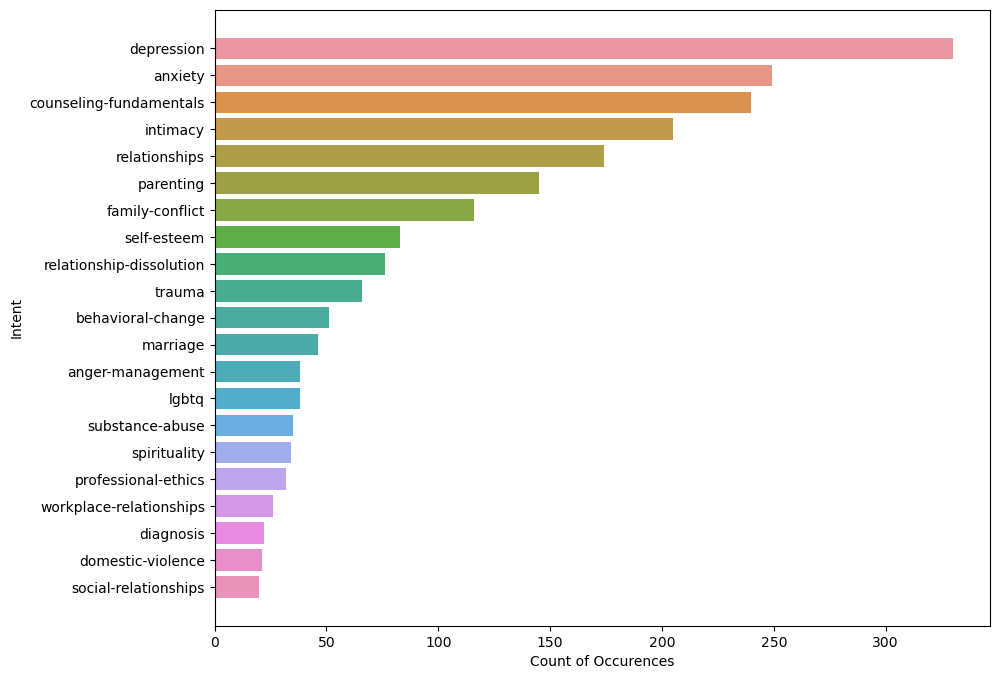

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(data=topic_count,y=topic_count['Intent'],x=topic_count['Count of Occurences'])
plt.plot()

In [15]:
df['topic'] = df['topic'].astype('category')

In [16]:
df['topic']

0                    depression
1                    depression
2                    depression
3                    depression
4                    depression
                 ...           
2042    counseling-fundamentals
2043    counseling-fundamentals
2044    counseling-fundamentals
2045    counseling-fundamentals
2046    counseling-fundamentals
Name: topic, Length: 2047, dtype: category
Categories (21, object): ['anger-management', 'anxiety', 'behavioral-change', 'counseling-fundamentals', ..., 'spirituality', 'substance-abuse', 'trauma', 'workplace-relationships']

### Label Encoding Categorical Features

In [17]:
encoder = LabelEncoder()
df['topic'] = encoder.fit_transform(df['topic'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047 entries, 0 to 2046
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          2047 non-null   int64 
 1   questionTitle  2047 non-null   object
 2   questionText   2047 non-null   object
 3   topic          2047 non-null   int32 
 4   answerText     2047 non-null   object
 5   split          2047 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 88.1+ KB


In [19]:
df['topic'].value_counts()

4     330
1     249
3     240
8     205
14    174
11    145
7     116
15     83
13     76
19     66
2      51
10     46
0      38
9      38
18     35
17     34
12     32
20     26
5      22
6      21
16     20
Name: topic, dtype: int64

### Cleaning Texts in order to tokenize it to few important tokens

In [20]:
sen = "I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it."


text = ''.join([x if x not in string.punctuation else ' ' for x in sen])


text = text.lower().split()


stop_words = set(stopwords.words('english'))
filtered_words = [word for word in text if word not in stop_words]
filtered_text = ' '.join(filtered_words)


filtered_text = re.sub(r'[^\w\s]', '', filtered_text)
filtered_text


'going things feelings barely sleep nothing think worthless never tried contemplated suicide always wanted fix issues never get around'

In [21]:
def clean_text(text):
    text = ''.join([x if x not in string.punctuation else ' ' for x in text])
    text = text.lower().split()
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in text if word not in stop_words]
    filtered_text = ' '.join(filtered_words)


    filtered_text = re.sub(r'[^\w\s]', '', filtered_text)
    return filtered_text

df['qtext_tokenized'] = df['questionText'].apply(clean_text)

In [22]:
df

,index,questionTitle,questionText,topic,answerText,split,qtext_tokenized
0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,4,"If everyone thinks you're worthless, then mayb...",train,going things feelings barely sleep nothing thi...
1,1,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,4,"Hello, and thank you for your question and see...",train,going things feelings barely sleep nothing thi...
2,2,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,4,First thing I'd suggest is getting the sleep y...,train,going things feelings barely sleep nothing thi...
3,3,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,4,Therapy is essential for those that are feelin...,train,going things feelings barely sleep nothing thi...
4,4,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,4,I first want to let you know that you are not ...,train,going things feelings barely sleep nothing thi...
...,...,...,...,...,...,...,...
2042,2124,What happens in a counseling session?,"After first meeting the client, what is the pr...",3,There are probably no two therapists alike bec...,train,first meeting client process counselor facilit...
2043,2125,What happens in a counseling session?,"After first meeting the client, what is the pr...",3,"Each counselor may have a different process, s...",train,first meeting client process counselor facilit...
2044,2126,What happens in a counseling session?,"After first meeting the client, what is the pr...",3,"After meeting a client, many Counselors will a...",train,first meeting client process counselor facilit...
2045,2127,What happens in a counseling session?,"After first meeting the client, what is the pr...",3,A good therapist will discuss what brought you...,train,first meeting client process counselor facilit...


In [23]:
len(df['topic'].unique().tolist())

21

In [24]:
df.duplicated().sum()

0

In [25]:
X = df.drop(columns=['topic'])

In [26]:
X.shape

(2047, 6)

In [27]:
X['split'].value_counts()

train    1763
val       172
test      112
Name: split, dtype: int64

### Splitting Data into Train,Validation and Split

In [28]:
X_train = X[df['split']=="train"]
X_val   = X[df['split']=="val"]
X_test  = X[df['split']=="test"]

print("Shapes for train , val , test are {} {} {}".format(X_train.shape,X_val.shape,X_test.shape))

Shapes for train , val , test are (1763, 6) (172, 6) (112, 6)


In [29]:
Y_train = df.iloc[X_train.index]['topic']
Y_val  =  df.iloc[X_val.index]['topic']
Y_test =  df.iloc[X_test.index]['topic']

### Using TFIDF to vectorize Texts

In [30]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train['qtext_tokenized'])
X_val_vec   = vectorizer.transform(X_val['qtext_tokenized'])
X_test_vec  = vectorizer.transform(X_test['qtext_tokenized'])

In [31]:
X_train_vec[0]

<1x3155 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

### Applying SVM,Support Vector Classifier and Naive Bayes 

In [32]:
models = [
    SVC(kernel="rbf", gamma=0.1),
    RandomForestClassifier(n_estimators=100,random_state=44),
    MultinomialNB()
]

table = PrettyTable()
table.field_names = ["Model", "Accuracy_Train","Accuracy_CV","Accuracy_Test"]

for model in models:
        model.fit(X_train_vec,Y_train)
        y_pred_train = model.predict(X_train_vec)
        accuracy_train = getaccuracy(y_pred_train,Y_train)
        
        y_pred_val = model.predict(X_val_vec)
        accuracy_val = getaccuracy(y_pred_val,Y_val)

        y_pred_test = model.predict(X_test_vec)
        accuracy_test = getaccuracy(y_pred_test,Y_test)
        table.add_row([type(model).__name__, format(accuracy_train, '.2f'), format(accuracy_val, '.2f'),format(accuracy_test, '.2f')])


### Analyzing Accuracy among train,test,val

In [33]:
table

Model,Accuracy_Train,Accuracy_CV,Accuracy_Test
SVC,64.15,34.30,25.00
RandomForestClassifier,95.97,38.95,38.39
MultinomialNB,71.36,31.40,17.86


In [43]:
models[1].fit(X_train_vec, Y_train)

RandomForestClassifier(random_state=44)

In [44]:
y_pred_train = models[1].predict(X_train_vec)
y_pred_train

array([4, 4, 4, ..., 3, 3, 3])

In [45]:
def getaccuracy(y_pred,y):
    accuracy = (((y_pred==y).astype(int).sum())/(len(y)))*100
    return accuracy

In [46]:
accuracy_train = getaccuracy(y_pred_train,Y_train)
accuracy_train

95.97277368122519

In [48]:
y_pred_val = models[1].predict(X_val_vec)
accuracy_val = getaccuracy(y_pred_val,Y_val)
accuracy_val

38.95348837209303

In [49]:
y_pred_test = models[1].predict(X_test_vec)
accuracy_test = getaccuracy(y_pred_test,Y_test)
accuracy_test

38.392857142857146

## Classification Reports

In [51]:
report = classification_report(y_pred_train, Y_train, output_dict=True, zero_division=0)
report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 37},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 217},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 49},
 '3': {'precision': 1.0,
  'recall': 0.7481203007518797,
  'f1-score': 0.8559139784946237,
  'support': 266},
 '4': {'precision': 0.8356164383561644,
  'recall': 0.9878542510121457,
  'f1-score': 0.9053803339517625,
  'support': 247},
 '5': {'precision': 0.8421052631578947,
  'recall': 0.9411764705882353,
  'f1-score': 0.8888888888888888,
  'support': 17},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17},
 '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 101},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 145},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34},
 '10': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 44},
 '11': {'precision': 1.0, 'recall': 1.0, 'f1-score': 

In [40]:
report = classification_report(y_pred_val, Y_val, output_dict=True, zero_division=0)
report

{'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '1': {'precision': 0.32142857142857145,
  'recall': 0.5294117647058824,
  'f1-score': 0.39999999999999997,
  'support': 17},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '4': {'precision': 1.0,
  'recall': 0.31521739130434784,
  'f1-score': 0.4793388429752066,
  'support': 92},
 '5': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '8': {'precision': 0.43478260869565216,
  'recall': 0.8333333333333334,
  'f1-score': 0.5714285714285714,
  'support': 24},
 '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '10': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0},
 '11': {'precision': 0.18181818181818182,
  'recall': 0.666666

### Testing against Custom Input

In [53]:
def getintent(test_input):
    input_txt = clean_text(test_input)
    input_txt = vectorizer.transform([test_input])
    pred = models[1].predict(input_txt)
    intent = encoder.inverse_transform(pred)[0]
    return intent

In [54]:
intent = getintent("I often find myself on edge, worrying about things that might never happen")
intent

'behavioral-change'

In [55]:
intent = getintent("It's like I'm living in a never-ending fog, where even the simplest tasks feel overwhelmingly difficult.")
intent


'depression'

In [56]:
intent = getintent("I pretend we aren't married at my work. Recently, he has caught on, but I lie to cover it. He use to talk to girls online, but I have caught myself constantly having a affair.")
intent

'intimacy'

In [57]:
text = "He is verbally abusive. When he gets mad, he just yells at me. At times, I feel scared."
intent = getintent(text)
intent

'domestic-violence'

In [58]:

text = "When I'm in large crowds I get angry and I just can't deal with people."
intent = getintent(text)
intent

'anxiety'